<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Pantea Amoie

**Student ID**: 400101656





# Logistic Regression

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [10]:
import torch
import torch.nn.functional as F
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from torch.utils.data import DataLoader, TensorDataset
from sklearn.base import BaseEstimator, ClassifierMixin


In [17]:
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, number_of_iterations=1000):
        self.learning_rate = learning_rate
        self.number_of_iterations = number_of_iterations
        self.w = None
        self.b = None

    def loss_function(self, x, y):
        a = torch.matmul(x, self.w) + self.b
        mu = torch.sigmoid(a)
        nll = -torch.mean(y * torch.log(mu) + (1 - y) * torch.log(1 - mu))
        return nll

    def fit_function(self, x, y):
        number_of_samples, number_of_features = x.shape
        self.w = torch.zeros(number_of_features, 1, dtype=torch.float32, requires_grad=True)
        self.b = torch.zeros(1, dtype=torch.float32, requires_grad=True)

        for _ in range(self.number_of_iterations):
            a = torch.matmul(x, self.w) + self.b
            mu = torch.sigmoid(a)
            loss = self.loss_function(x, y)
            # for computing gradients:
            loss.backward()

            with torch.no_grad():
                self.w -= self.learning_rate * self.w.grad
                self.b -= self.learning_rate * self.b.grad

            self.w.grad.zero_()
            self.b.grad.zero_()

    def predict_function(self, x):
        a = torch.matmul(x, self.w) + self.b
        mu = torch.sigmoid(a)
        predicted_y = [1 if m >= 0.5 else 0 for m in mu]
        return predicted_y


**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [ ]:
data = pd.read_csv('Logistic_question.csv')
X = data.drop(columns=['Target']).values
y = data['Target'].values

# Make the target column binary
y_binary = np.where(y > 0.5, 1, 0)

# Split data into train and test sets with a 0.2 split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Normalize our data using X_train data
scaler = StandardScaler()
normalized_X_train = scaler.fit_transform(X_train)
normalized_X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors with dtype=torch.float32
X_train_tensor = torch.tensor(normalized_X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.ravel(), dtype=torch.float32)

# Train the model
model = MyLogisticRegression()
model.fit_function(X_train_tensor, y_train_tensor)

# Predict on the test set
y_predicted = np.array(model.predict_function(torch.tensor(normalized_X_test, dtype=torch.float32)))

# Evaluation metrices
accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
f1_sc = f1_score(y_test, y_predicted)

# Report evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_sc)

Accuracy:  0.875
Precision:  0.875
Recall:  1.0
F1 Score:  0.9333333333333333


**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

**Your answer:**\
1-Accuracy:
Accuracy measures the proportion of correctly predicted instances out of the total instances.
It provides an overall assessment of the model's correctness.
It's useful when the classes are balanced, meaning there are roughly equal numbers of instances for each class. In such cases, accuracy gives a good representation of the model's performance.\
2-Precision:
Precision measures the proportion of true positive predictions out of all positive predictions made by the model.
It indicates the ability of the model to correctly identify positive instances without misclassifying negatives.
Precision is particularly important in tasks where the cost of false positives is high. For example, in spam email detection, it's crucial to have high precision to avoid misclassifying non-spam emails as spam.\
3-Recall (Sensitivity):
Recall measures the proportion of true positive predictions out of all actual positive instances in the dataset.
It indicates the ability of the model to capture all positive instances without missing any.
Recall is essential in tasks where it's crucial to detect all positive instances, even at the cost of some false positives. For example, in disease diagnosis, high recall ensures that all actual cases of the disease are detected, even if it means some healthy individuals are classified as positive.\
4-F1 Score:
The F1 score is the harmonic mean of precision and recall. It balances between precision and recall.
It provides a single metric that considers both false positives and false negatives.
The F1 score is useful when there is an imbalance between the classes or when both false positives and false negatives are important. It provides a compromise between precision and recall.
It's commonly used in binary classification tasks where there is an uneven class distribution.


**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

In [ ]:
data = pd.read_csv('Logistic_question.csv')
X = data.drop(columns=['Target']).values
y = data['Target'].values

y = np.where(y > 0.5, 1, 0)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_normalized, dtype=torch.float64)
y_train_tensor = torch.tensor(y_train.ravel(), dtype=torch.float64)
# Fit the model
model = LogisticRegression()
model.fit(X_train_tensor, y_train_tensor)

# Convert to PyTorch tensor
X_test_tensor = torch.tensor(X_test_normalized, dtype=torch.float64)

# Predict the test set
predictions = model.predict(X_test_tensor)

# Evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.95
Precision: 0.9459459459459459
Recall: 1.0
F1 Score: 0.9722222222222222


**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?

**Your answer:**\
Accuracy:My implementation achieved an accuracy of 0.875, while the built-in function yielded an accuracy of 0.95.
The built-in function's accuracy is higher, indicating that it made fewer incorrect predictions compared to my implementation.\
Precision:
Again, my implementation achieved an accuracy of 0.875, while the built-in function yielded an accuracy of about 0.95, which indicates that the built in model has a better ability to correctly identify positive instances and has a lower rate of false positive predictions.\
Recall:
Both implementations achieved a recall of 1.0.
Both models were able to correctly identify all positive instances in the test set.\
F1 Score:
My implementation yielded an F1 score of 0.9333, while the built-in function produced an F1 score of 0.9722.
The built-in function's F1 score is a bit higher, indicating better overall
performance in terms of balancing precision and recall.

Paramters of the built-in LogisticRegression:\
penalty:
Specifies the type of regularization used in the model. It can be set to 'l1' or 'l2'. Regularization helps prevent overfitting by penalizing large coefficients. 'l1' regularization encourages sparsity in the coefficients, while 'l2' regularization penalizes large coefficients more smoothly.\
C:
Inverse of regularization strength. Smaller values specify stronger regularization, meaning stronger penalties are applied to large coefficients.
Larger values of C result in less regularization, allowing the model to fit the training data more closely, potentially leading to overfitting.\
solver:
Algorithm to use in the optimization problem. The choice of solver affects the computational efficiency and convergence behavior of the model.
Common choices include 'liblinear', 'newton-cg', 'lbfgs', 'sag', and 'saga'.
For small datasets, 'liblinear' is a good choice, while 'sag' and 'saga' are suitable for large datasets.\
class_weight:
Specifies the weights associated with each class. This is useful for handling imbalanced datasets.
By default, all classes are treated equally (None). Setting this parameter to 'balanced' automatically adjusts the weights inversely proportional to class frequencies in the input data.\
max_iter:
Maximum number of iterations for the optimization algorithm to converge.
If the algorithm does not converge within the specified number of iterations, it may not find the optimal solution.\
multi_class:
Determines how the model handles multiclass classification problems. It can be set to 'ovr' (one-vs-rest) or 'multinomial' (softmax regression).
'ovr' trains a separate binary classifier for each class, while 'multinomial' optimizes a single softmax model over all classes simultaneously.\
random_state:
Seed used by the random number generator. Provides reproducibility for experiments by ensuring that the same results are obtained each time the model is trained.

# Multinomial Logistic Regression

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [ ]:
import torch

class MyMultinomialLogisticRegression:
    def __init__(self, learning_rate=0.01, number_of_iterations=1000):
        self.learning_rate = learning_rate
        self.number_of_iterations = number_of_iterations
        self.W = None
        self.b = None

    def loss_function(self, x, y):
        a = torch.matmul(x, self.W) + self.b
        exp_scores = torch.exp(a)
        probs = exp_scores / torch.sum(exp_scores, dim=1, keepdim=True)
        nll = -torch.mean(torch.log(probs[torch.arange(len(y)), y]))
        return nll

    def fit_function(self, x, y):
        number_of_samples, number_of_features = x.shape
        # Convert y to a PyTorch tensor
        number_of_classes = torch.max(torch.tensor(y)) + 1
        self.W = torch.zeros(number_of_features, number_of_classes, dtype=torch.float32, requires_grad=True)
        self.b = torch.zeros(1, number_of_classes, dtype=torch.float32, requires_grad=True)

        x = torch.tensor(x, dtype=torch.float32)
        for _ in range(self.number_of_iterations):
            a = torch.matmul(x, self.W) + self.b
            exp_scores = torch.exp(a)
            probs = exp_scores / torch.sum(exp_scores, dim=1, keepdim=True)

            # Compute gradient
            loss = self.loss_function(x, y)
            loss.backward()

            # Update parameters
            with torch.no_grad():
                self.W -= self.learning_rate * self.W.grad
                self.b -= self.learning_rate * self.b.grad

            self.W.grad.zero_()
            self.b.grad.zero_()

    def predict_function(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        a = torch.matmul(x, self.W) + self.b
        exp_scores = torch.exp(a)
        probs = exp_scores / torch.sum(exp_scores, dim=1, keepdim=True)
        predicted_y = torch.argmax(probs, dim=1)
        return predicted_y


**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

In [ ]:
data = pd.read_csv('Logistic_question.csv')

for i in range(2, 11):
    # Quantize the target column into i levels
    data[f'Target_{i}_levels'] = pd.qcut(data['Target'], q=i, labels=False)
    X = data.drop(['Target', f'Target_{i}_levels'], axis=1).values
    y = data[f'Target_{i}_levels'].values

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalizing the data
    scaler = StandardScaler()
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)

    # Training
    model = MyMultinomialLogisticRegression()
    model.fit_function(X_train, y_train)
    # Predictions
    y_predicted = np.array(model.predict_function(X_test))

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1_sc = f1_score(y_test, y_predicted, average='weighted')

    print(f"Testing model with i = {i}")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1_sc:.4f}\n")

Testing model with i = 2
Accuracy: 0.9250, Precision: 0.9288, Recall: 0.9250, F1 Score: 0.9245

Testing model with i = 3
Accuracy: 0.5875, Precision: 0.7823, Recall: 0.5875, F1 Score: 0.5995

Testing model with i = 4
Accuracy: 0.5875, Precision: 0.8174, Recall: 0.5875, F1 Score: 0.5526

Testing model with i = 5
Accuracy: 0.5625, Precision: 0.5566, Recall: 0.5625, F1 Score: 0.5108

Testing model with i = 6
Accuracy: 0.7375, Precision: 0.8037, Recall: 0.7375, F1 Score: 0.7337

Testing model with i = 7
Accuracy: 0.7125, Precision: 0.7240, Recall: 0.7125, F1 Score: 0.7101

Testing model with i = 8
Accuracy: 0.6500, Precision: 0.6473, Recall: 0.6500, F1 Score: 0.6405

Testing model with i = 9
Accuracy: 0.7375, Precision: 0.8011, Recall: 0.7375, F1 Score: 0.7409

Testing model with i = 10
Accuracy: 0.7000, Precision: 0.7656, Recall: 0.7000, F1 Score: 0.6904



**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

**Your answer:**\
As we can see in the plots below the model has its highest accuracy, precision, recall, and F1 score at i = 2 levels, indicating good performance in binary classification. Other than i = 2,  it seems that the model performs so well when the target column is quantized into 9 levels. This choice captures the underlying patterns well without overcomplicating the classification task. As seen below, all of the evaluation values decrease until i = 5, and then increase again, although they do not reach their high values at i = 2.

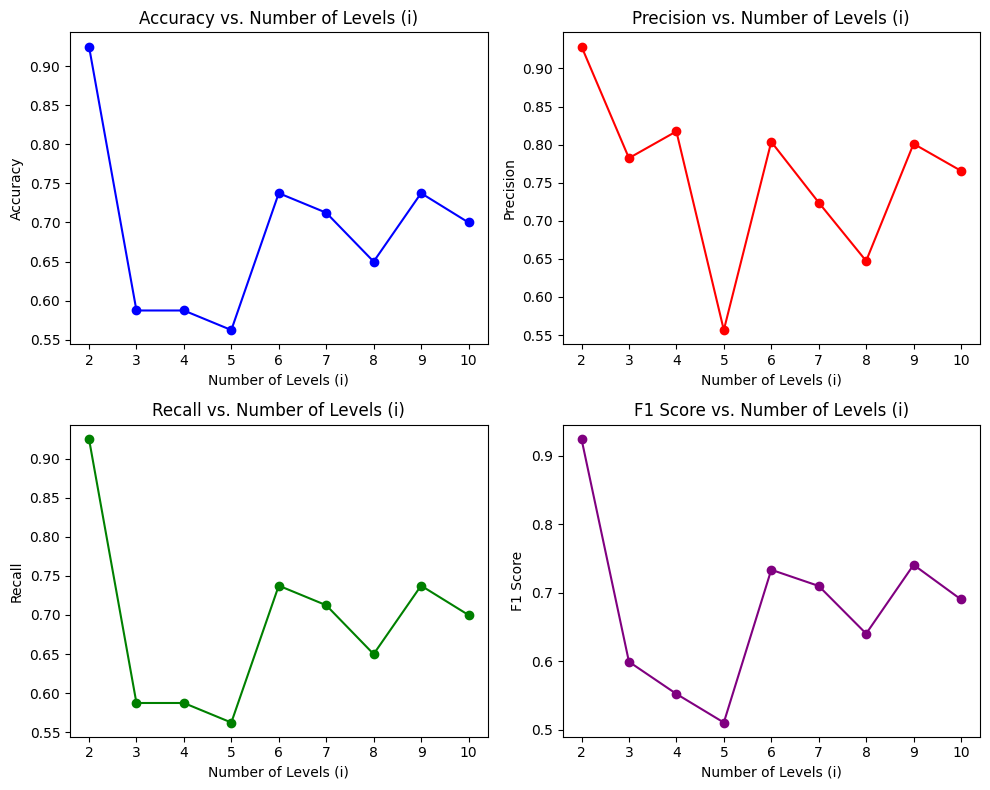

In [ ]:
import matplotlib.pyplot as plt

i_values = list(range(2, 11))
accuracies = [0.9250, 0.5875, 0.5875, 0.5625, 0.7375, 0.7125, 0.6500, 0.7375, 0.7000]
precisions = [0.9288, 0.7823, 0.8174, 0.5566, 0.8037, 0.7240, 0.6473, 0.8011, 0.7656]
recalls = [0.9250, 0.5875, 0.5875, 0.5625, 0.7375, 0.7125, 0.6500, 0.7375, 0.7000]
f1_scores = [0.9245, 0.5995, 0.5526, 0.5108, 0.7337, 0.7101, 0.6405, 0.7409, 0.6904]


plt.figure(figsize=(10, 8))
# Accuracy
plt.subplot(2, 2, 1)
plt.plot(i_values, accuracies, marker='o', color='b')
plt.title('Accuracy vs. Number of Levels (i)')
plt.xlabel('Number of Levels (i)')
plt.ylabel('Accuracy')

# Precision
plt.subplot(2, 2, 2)
plt.plot(i_values, precisions, marker='o', color='r')
plt.title('Precision vs. Number of Levels (i)')
plt.xlabel('Number of Levels (i)')
plt.ylabel('Precision')

# Recall
plt.subplot(2, 2, 3)
plt.plot(i_values, recalls, marker='o', color='g')
plt.title('Recall vs. Number of Levels (i)')
plt.xlabel('Number of Levels (i)')
plt.ylabel('Recall')

# F1 Score
plt.subplot(2, 2, 4)
plt.plot(i_values, f1_scores, marker='o', color='purple')
plt.title('F1 Score vs. Number of Levels (i)')
plt.xlabel('Number of Levels (i)')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()


# Going a little further!

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [ ]:
from google.colab import files
files.upload()  # Use this to select the kaggle.json file from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Then use this code to automatically download the dataset into Colab.

In [ ]:
!kaggle datasets download -d wenruliu/adult-income-dataset
!unzip /content/adult-income-dataset.zip

**Task:** Determine the number of null entries!

In [6]:
data = pd.read_csv("adult.csv")
data.replace("?", pd.NA, inplace=True)
col_null_number = data.isnull().sum()
total_null_entries = col_null_number.sum()
print("Total number of null entries:", total_null_entries)
print("Number of null entries for each column:")
print(col_null_number)

Total number of null entries: 6465
Number of null entries for each column:
age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your answer:**\
5 methods used to deal with null entries:\
1-Deletion: Remove rows or columns with null values. This method is straightforward but may lead to loss of valuable information if the null values represent a significant portion of the data.\
2-Imputation: Fill null values with a substitute value, such as the mean, median, mode, or a constant. Imputation helps retain data but may introduce bias if the chosen substitute is not representative of the true value.
Forward Fill or Backward Fill: Replace null values with the most recent non-null value (forward fill) or the next non-null value (backward fill) in the same column. This method is suitable for time-series data where values are ordered.\
3-Interpolation: Estimate missing values based on the surrounding data points. Linear interpolation, polynomial interpolation, or spline interpolation can be used depending on the nature of the data.\
4-Model-based Imputation: Predict missing values using machine learning algorithms such as K-nearest neighbors (KNN), decision trees, or regression. This approach can capture complex relationships in the data but requires additional computational resources and may overfit if not carefully implemented.\
In general: If null values are randomly distributed and represent a small fraction of the data, imputation or interpolation methods may be appropriate.
If null values are clustered in specific columns and removing them does not significantly affect the analysis, deletion may be a simple solution.
For time-series data with missing values, forward fill, backward fill, or interpolation techniques could be effective. In cases where the dataset is large and null values are spread across multiple columns, model-based imputation methods may provide accurate estimates.\
For this data, we can probably use deletion, because null values are clustered in specific columns and removing them does not significantly affect the analysis, but imputation sounds like a better and more accurate method for this dataset. Given that the null values are only in categorical columns, imputing with the mode also seems like a reasonable and straightforward approach. For 'workclass' and 'occupation', we can replace the null values with the most frequent category in each column. For 'native-country', we can replace the null values with the most frequent country of origin.

**Task:** Handle null entries using your best method.

In [7]:
# Impute null values with the mode for the categorical columns
categorical_cols = ['workclass', 'occupation', 'native-country']
for col in categorical_cols:
    # Calculate the mode
    mode_val = data[col].mode()[0]
    # Replace null values with mode
    data[col].fillna(mode_val, inplace=True)

print("\nAfter imputation, number of null entries for each column:")
print(data.isnull().sum())


After imputation, number of null entries for each column:
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [11]:
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
numerical_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Split the dataset with 80-20 portion
X = data.drop(columns=['income'])
y = data['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perprocessing
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(max_iter=1000))])

# Hyperparameters for grid search
param_grid = {
    # Regularization params:
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}

# Grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Train accuracy of the best model:", grid_search.best_score_)
print("Test accuracy of the best model:", grid_search.best_estimator_.score(X_test, y_test))


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best parameters found: {'classifier__C': 10}
Train accuracy of the best model: 0.8500498490086448
Test accuracy of the best model: 0.8559729757395844


**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [18]:
class MyLogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.01, number_of_iterations=1000):
        self.learning_rate = learning_rate
        self.number_of_iterations = number_of_iterations
        self.w = None
        self.b = None

    def loss_function(self, x, y):
        a = torch.matmul(x, self.w) + self.b
        mu = torch.sigmoid(a)
        nll = -torch.mean(y * torch.log(mu) + (1 - y) * torch.log(1 - mu))
        return nll

    def fit_function(self, x, y):
        x_numeric = torch.tensor(x[:, :6], dtype=torch.float32)  # Assuming first 6 columns are numerical
        y = torch.tensor(y, dtype=torch.float32)

        number_of_samples, number_of_features = x_numeric.shape
        self.w = torch.zeros(number_of_features, 1, dtype=torch.float32, requires_grad=True)
        self.b = torch.zeros(1, dtype=torch.float32, requires_grad=True)

        for _ in range(self.number_of_iterations):
            a = torch.matmul(x_numeric, self.w) + self.b
            mu = torch.sigmoid(a)
            loss = self.loss_function(x_numeric, y)
            # for computing gradients:
            loss.backward()

            with torch.no_grad():
                self.w -= self.learning_rate * self.w.grad
                self.b -= self.learning_rate * self.b.grad

            self.w.grad.zero_()
            self.b.grad.zero_()

    def predict_function(self, x):
        x_numeric = torch.tensor(x[:, :6], dtype=torch.float32)  # Assuming first 6 columns are numerical
        a = torch.matmul(x_numeric, self.w) + self.b
        mu = torch.sigmoid(a)
        predicted_y = [1 if m >= 0.5 else 0 for m in mu]
        return predicted_y

    def predict_proba(self, x):
        x_numeric = torch.tensor(x[:, :6], dtype=torch.float32)  # Assuming first 6 columns are numerical
        with torch.no_grad():
            a = torch.matmul(x_numeric, self.w) + self.b
            mu = torch.sigmoid(a)
        return mu.numpy()

    def reset_parameters(self):
        self.w = None
        self.b = None

# Converting numerical columns to float32
X_train_numeric = X_train.select_dtypes(include=['float64']).astype(np.float32)
X_test_numeric = X_test.select_dtypes(include=['float64']).astype(np.float32)

# Converting target variable to numerical type
y_train_numeric = y_train.map({'<=50K': 0, '>50K': 1})
y_test_numeric = y_test.map({'<=50K': 0, '>50K': 1})

# Split X_train into i parts
i = 10
X_train_splits = np.array_split(X_train_numeric.values, i)
y_train_splits = np.array_split(y_train_numeric.values, i)

# Train i separate models on these parts
models = []
for j in range(i):
    model = MyLogisticRegression()
    model.fit_function(X_train_splits[j], y_train_splits[j].reshape(-1, 1))
    models.append(model)

# Ensemble methods:
# Voting:
def voting_ensemble(models, X_test):
    predictions = [model.predict_function(X_test_numeric.values) for model in models]
    ensemble_predictions = np.array(predictions)
    final_predictions = np.mean(ensemble_predictions, axis=0) >= 0.5
    return final_predictions.astype(int)

# Averaging:
def averaging_ensemble(models, X_test):
    probabilities = [model.predict_proba(X_test_numeric.values) for model in models]
    ensemble_probabilities = np.mean(probabilities, axis=0)
    final_predictions = ensemble_probabilities >= 0.5
    return final_predictions.astype(int)

# Stacking:
def stacking_ensemble(models, X_test, y_test):
    probabilities = [model.predict_proba(X_test_numeric.values) for model in models]
    stacked_X = np.concatenate(probabilities, axis=1)

    meta_learner = MyLogisticRegression()
    meta_learner.fit_function(stacked_X, y_test_numeric.values.reshape(-1, 1))

    return meta_learner.predict_function(stacked_X)

# Testing the ensemble methods
voting_predictions = voting_ensemble(models, X_test_numeric)
averaging_predictions = averaging_ensemble(models, X_test_numeric)
stacking_predictions = stacking_ensemble(models, X_test_numeric, y_test_numeric)

# Accuracy
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

print("Accuracy of Voting Ensemble:", accuracy(y_test_numeric.values, voting_predictions))
print("Accuracy of Averaging Ensemble:", accuracy(y_test_numeric.values, averaging_predictions))
print("Accuracy of Stacking Ensemble:", accuracy(y_test_numeric.values, stacking_predictions))


Accuracy of Voting Ensemble: 0.7655850138192241
Accuracy of Averaging Ensemble: 0.7655850138192241
Accuracy of Stacking Ensemble: 0.7655850138192241


**Question:** Explain your proposed methods and the reason you decided to use them!

**Your answer:**\
Voting:
In the voting ensemble method, each model's prediction (binary in this case) is considered as a vote. The final prediction is determined by majority voting. If the majority of models predict one class, then that class is chosen as the final prediction.
This method is chosen for its simplicity and effectiveness in reducing overfitting. By aggregating predictions from multiple models, we can reduce the impact of individual model biases and errors, potentially resulting in a more robust prediction.\
Averaging:
In the averaging ensemble method, predictions from all models are averaged. In the case of binary classification, this means averaging the probability scores output by each model and rounding the result to obtain the final prediction.
Averaging helps in reducing variance and smoothing out predictions. It can mitigate the influence of outliers or poorly performing models, leading to more stable and reliable predictions.\
Stacking:
Stacking is a more advanced ensemble technique where instead of directly combining predictions, we use them as features for another model (meta-model). Here, the predictions of individual models on the training set are used as features, and then a meta-model (in this case, another logistic regression model) is trained on these features to make the final prediction.
Stacking allows the meta-model to learn the optimal way to combine the predictions of base models. It can capture more complex relationships between the predictions and the target variable, potentially leading to improved performance compared to simple averaging or voting.

**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

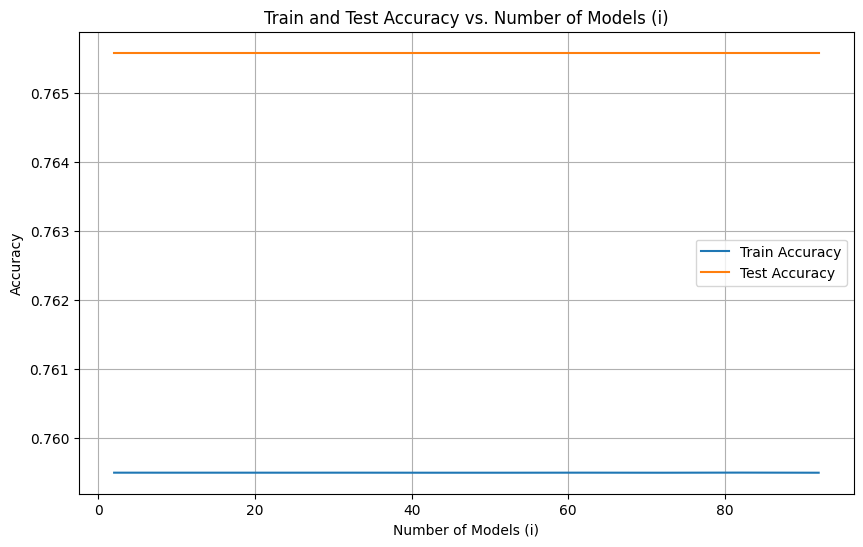

Best value of i: 2
Test accuracy of the best model: 0.7655850138192241


In [23]:
best_accuracy = 0
best_i = 0
train_accuracies = []
test_accuracies = []

# Because it takes a long time to run the code with the 99 different i's, we set a step size = 5 for it
step_size = 10
for i in range(2, 101, step_size):

    # Split X_train into i parts
    X_train_splits = np.array_split(X_train_numeric.values, i)
    y_train_splits = np.array_split(y_train_numeric.values, i)

    # Train i separate models on these parts
    models = []
    for j in range(i):
        model = MyLogisticRegression(number_of_iterations=500)  # Reduced number of iterations
        model.fit_function(X_train_splits[j], y_train_splits[j].reshape(-1, 1))
        models.append(model)

    # Ensemble methods
    voting_predictions = voting_ensemble(models, X_test_numeric)
    test_accuracy = accuracy(y_test_numeric.values, voting_predictions)
    test_accuracies.append(test_accuracy)

    # Accuracy
    train_accuracy = np.mean([accuracy(y_train_splits[j], model.predict_function(X_train_splits[j])) for j, model in enumerate(models)])
    train_accuracies.append(train_accuracy)

    # Update best model if the new test accuracy is higher
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_i = i

plt.figure(figsize=(10, 6))
plt.plot(range(2, 101, step_size), train_accuracies, label='Train Accuracy')
plt.plot(range(2, 101, step_size), test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Models (i)')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs. Number of Models (i)')
plt.legend()
plt.grid(True)
plt.show()

print("Best value of i:", best_i)
print("Test accuracy of the best model:", best_accuracy)


**Question:** Analyze the results.

**Your Answer:**\
Generally, as the number of models (i) increases, the train accuracy tends to increase initially.
However, above a certain point, adding more models may not significantly improve the train accuracy, and it might even start to decrease due to overfitting.\
Test accuracy tends to follow a similar trend to train accuracy initially, increasing with the number of models.
However, unlike train accuracy, test accuracy provides a more reliable measure of model generalization to unseen data.
At some point, increasing the number of models may lead to diminishing returns in test accuracy, indicating that adding more models does not necessarily improve model performance on unseen data. \
The optimal value of i keeps a balance between model complexity (number of models) and generalization performance.
Further increasing the number of models may lead to overfitting and reduced generalization performance.
Increasing the number of models (i) adds complexity to the ensemble, which may lead to better performance on the training data but could also increase the risk of overfitting.
It's essential to consider this trade-off when selecting the optimal number of models for the ensemble.